In [7]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os, glob

def read_csv_folder(path):
    files = glob.glob(os.path.join(path,'*.csv'))
    files.sort()
    l=[]
    for f in files:
        l.append(pd.read_csv(f))
    return pd.concat(l,axis=0, ignore_index=True)

In [53]:
cpu=read_csv_folder("../data/snmplabo/cpu")
cpu['datetime']= mdates.num2date(mdates.datestr2num(cpu['datetime']))

cpu_load=cpu[["datetime","1m",'5m','15m']]

cpu.head(5)


,datetime,1m,5m,15m,put,rut,pst,rst,pit,rit,rnt
0,2023-05-04 12:31:01+00:00,0.11,0.05,0.05,0,4400756,0,2318662,98,970436300,65525
1,2023-05-04 12:35:02+00:00,0.08,0.04,0.05,0,4401262,0,2319138,98,970506904,65525
2,2023-05-04 12:40:01+00:00,0.00,0.03,0.05,0,4401731,0,2319587,99,970595571,65525
3,2023-05-04 12:45:01+00:00,0.11,0.06,0.05,0,4402427,0,2319948,99,970684122,65525
4,2023-05-04 12:50:01+00:00,0.00,0.02,0.05,0,4402993,0,2320296,98,970772818,65525


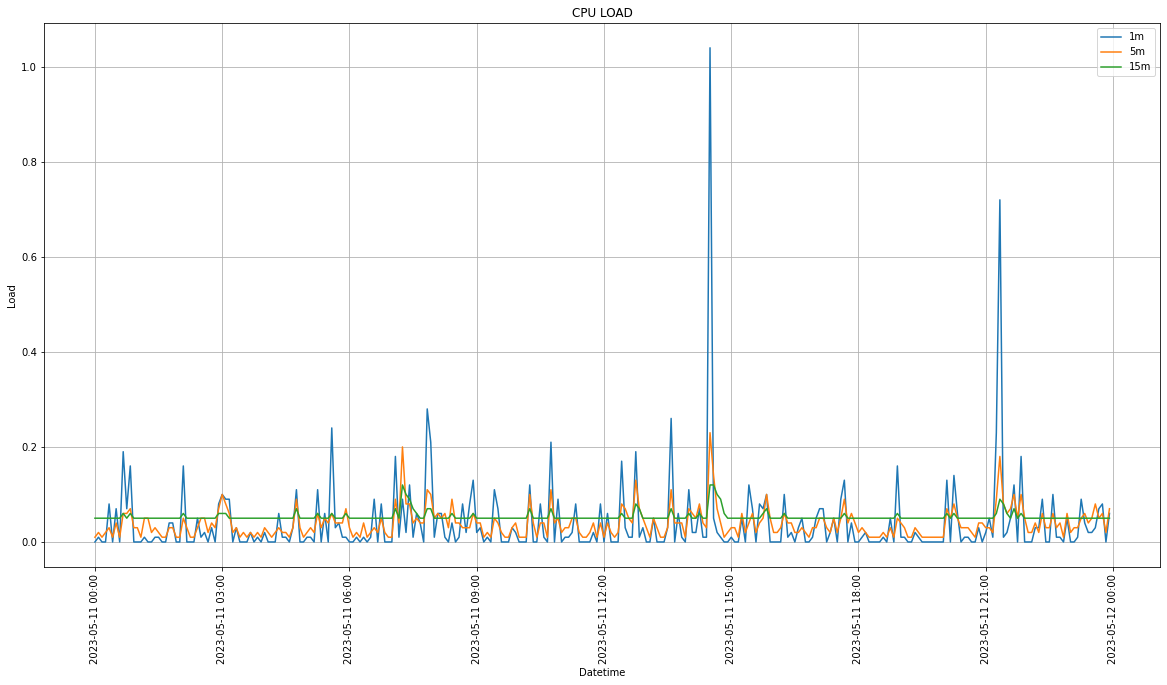

In [51]:
# Valeur à modifier pour zoomer en deux dates 
# Les données sont entre 2023-05-05 et 2023-05-23
date1 = mdates.num2date(mdates.datestr2num("2023-05-11")) 
date2 = mdates.num2date(mdates.datestr2num("2023-05-12"))

scpu=cpu[(cpu["datetime"] >= date1) & (cpu["datetime"] <= date2)]
dates = scpu['datetime']

plt.figure(figsize=(20,10))
plt.plot(dates,scpu["1m"],dates,scpu["5m"],dates,scpu["15m"])
plt.legend(["1m","5m","15m"])
plt.title("CPU LOAD")
plt.xlabel("Datetime")
plt.ylabel("Load")
plt.xticks(rotation="vertical")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%F %H:%M'))
plt.grid(visible=True)
plt.show()